<a href="https://colab.research.google.com/github/merajsiddieque/DS-LAB/blob/main/DS_Lab2_R_Lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data handling
library(dplyr)       # for data manipulation
library(tidyr)       # for data tidying
library(readr)       # for reading CSVs

# Visualization
library(ggplot2)     # for plotting

# Statistics
library(stats)       # base R stats functions
library(MASS)        # regression & distributions
install.packages("lmtest")
library(lmtest)      # hypothesis testing
install.packages("sandwich")
library(sandwich)    # robust standard errors

# Additional packages (similar to statsmodels in Python)
library(broom)       # tidy model outputs
install.packages("psych")
library(psych)       # descriptive stats



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
# Load necessary package
library(readr)

# Read the CSV file
df <- read_csv("/content/yellow_tripdata_sample.csv")

# Display first 6 rows (like head() in Python)
head(df)


Rows: 995 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): store_and_fwd_flag
dbl  (16): VendorID, passenger_count, trip_distance, RatecodeID, PULocationI...
dttm  (2): tpep_pickup_datetime, tpep_dropoff_datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,N,186,79,2,17.7,1.0,0.5,0.00,0,1,22.70,2.5,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1,N,140,236,1,10.0,3.5,0.5,3.75,0,1,18.75,2.5,0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1,N,236,79,1,23.3,3.5,0.5,3.00,0,1,31.30,2.5,0
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1,N,79,211,1,10.0,3.5,0.5,2.00,0,1,17.00,2.5,0
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1,N,211,148,1,7.9,3.5,0.5,3.20,0,1,16.10,2.5,0
1,2024-01-01 00:54:08,2024-01-01 01:26:31,1,4.70,1,N,148,141,1,29.6,3.5,0.5,6.90,0,1,41.50,2.5,0


In [3]:
# Structure of the data frame
str(df)

# Summary of each column
summary(df)

# Dimensions (rows, columns)
dim(df)


spc_tbl_ [995 × 19] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ VendorID             : num [1:995] 2 1 1 1 1 1 2 1 2 2 ...
 $ tpep_pickup_datetime : POSIXct[1:995], format: "2024-01-01 00:57:55" "2024-01-01 00:03:00" ...
 $ tpep_dropoff_datetime: POSIXct[1:995], format: "2024-01-01 01:17:43" "2024-01-01 00:09:36" ...
 $ passenger_count      : num [1:995] 1 1 1 1 1 1 2 0 1 1 ...
 $ trip_distance        : num [1:995] 1.72 1.8 4.7 1.4 0.8 ...
 $ RatecodeID           : num [1:995] 1 1 1 1 1 1 1 1 1 1 ...
 $ store_and_fwd_flag   : chr [1:995] "N" "N" "N" "N" ...
 $ PULocationID         : num [1:995] 186 140 236 79 211 148 138 246 161 113 ...
 $ DOLocationID         : num [1:995] 79 236 79 211 148 141 181 231 261 113 ...
 $ payment_type         : num [1:995] 2 1 1 1 1 1 1 2 2 2 ...
 $ fare_amount          : num [1:995] 17.7 10 23.3 10 7.9 29.6 45.7 25.4 31 3 ...
 $ extra                : num [1:995] 1 3.5 3.5 3.5 3.5 3.5 6 3.5 1 1 ...
 $ mta_tax              : num [1:995] 0.5 0.5 0.5 0.5 0.5 

    VendorID     tpep_pickup_datetime          tpep_dropoff_datetime        
 Min.   :1.000   Min.   :2023-12-31 23:39:17   Min.   :2023-12-31 23:42:00  
 1st Qu.:1.000   1st Qu.:2024-01-01 00:19:47   1st Qu.:2024-01-01 00:33:01  
 Median :2.000   Median :2024-01-01 00:33:26   Median :2024-01-01 00:47:59  
 Mean   :1.704   Mean   :2024-01-01 00:32:34   Mean   :2024-01-01 00:48:33  
 3rd Qu.:2.000   3rd Qu.:2024-01-01 00:45:23   3rd Qu.:2024-01-01 01:02:49  
 Max.   :2.000   Max.   :2024-01-01 01:01:55   Max.   :2024-01-01 01:49:51  
 passenger_count trip_distance      RatecodeID     store_and_fwd_flag
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Length:995        
 1st Qu.:1.000   1st Qu.: 1.125   1st Qu.: 1.000   Class :character  
 Median :1.000   Median : 1.960   Median : 1.000   Mode  :character  
 Mean   :1.582   Mean   : 2.890   Mean   : 1.139                     
 3rd Qu.:2.000   3rd Qu.: 3.400   3rd Qu.: 1.000                     
 Max.   :6.000   Max.   :23.900   Max.   

[1] 995  19

In [4]:
# Count NA values per column
colSums(is.na(df))


VendorID  tpep_pickup_datetime tpep_dropoff_datetime 
                    0                     0                     0 
      passenger_count         trip_distance            RatecodeID 
                    0                     0                     0 
   store_and_fwd_flag          PULocationID          DOLocationID 
                    0                     0                     0 
         payment_type           fare_amount                 extra 
                    0                     0                     0 
              mta_tax            tip_amount          tolls_amount 
                    0                     0                     0 
improvement_surcharge          total_amount  congestion_surcharge 
                    0                     0                     0 
          Airport_fee 
                    0

In [5]:
library(psych)

describe(df[, c("passenger_count", "trip_distance", "fare_amount",
                "total_amount", "tip_amount", "extra")])


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
passenger_count,1,995,1.581910,0.9116253,1.00,1.402760,0.000000,0.0,6.00,6.00,1.659315,2.7960080,0.02890047
trip_distance,2,995,2.890472,3.1252678,1.96,2.274931,1.452948,0.0,23.90,23.90,3.278265,13.8654604,0.09907765
fare_amount,3,995,18.278593,14.9164222,14.20,15.957340,8.302560,-47.8,180.00,227.80,3.003364,20.5823014,0.47288238
total_amount,4,995,26.847538,18.0920178,22.20,24.053300,9.963072,-52.8,217.20,270.00,3.016228,20.0403296,0.57355552
tip_amount,5,995,3.483146,4.1955070,3.00,2.914780,2.965200,0.0,80.00,80.00,7.306157,114.6632416,0.13300651
extra,6,995,1.741457,1.2557423,1.00,1.605709,0.000000,-1.0,7.75,8.75,1.146157,0.7009101,0.03980971


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


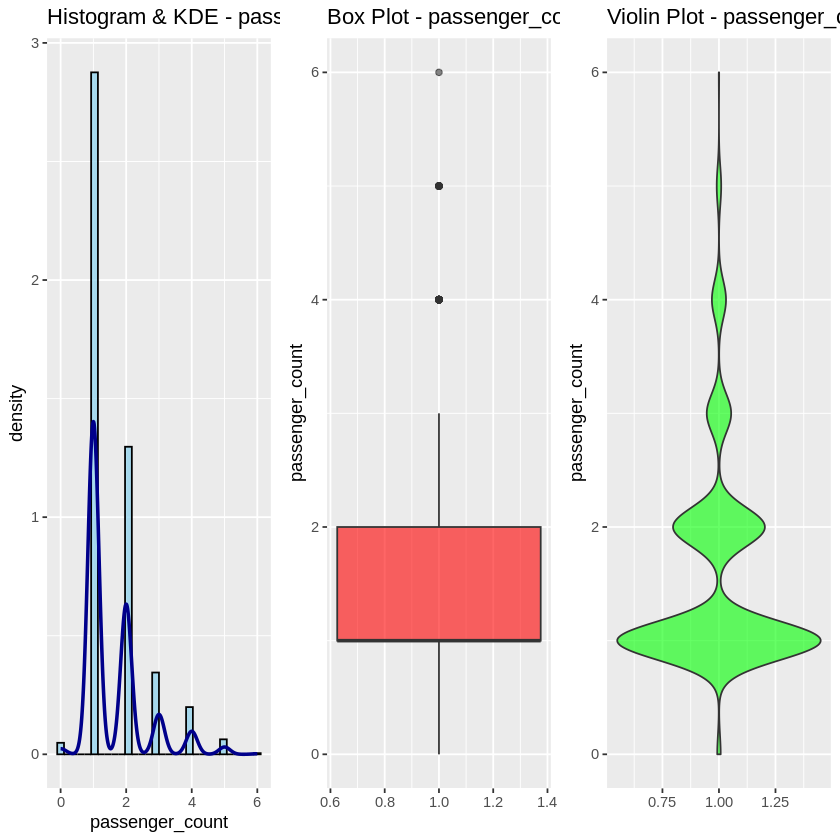

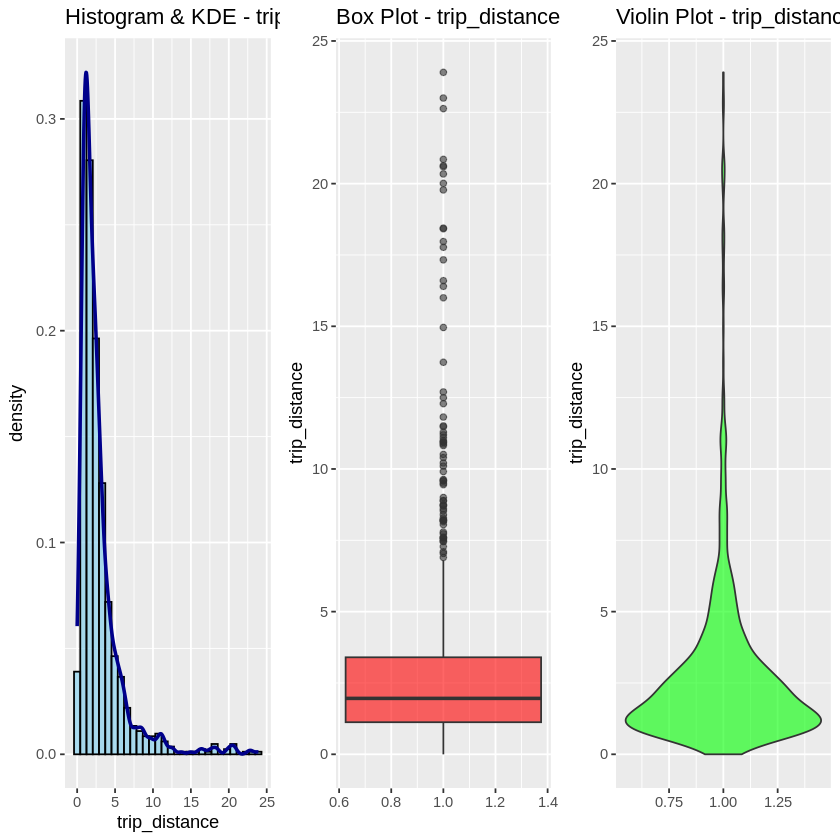

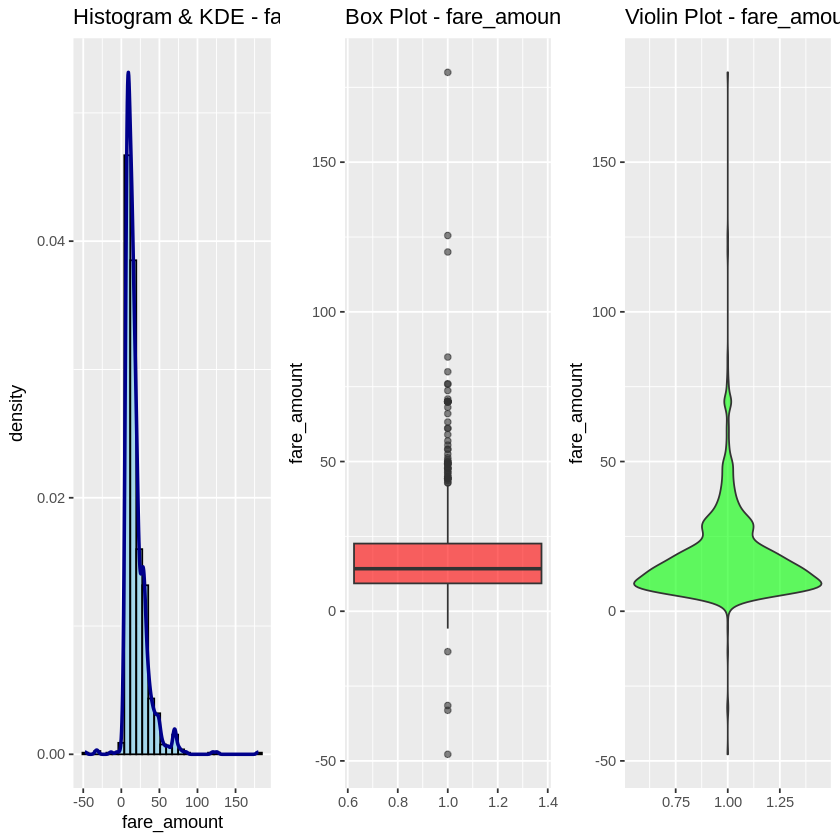

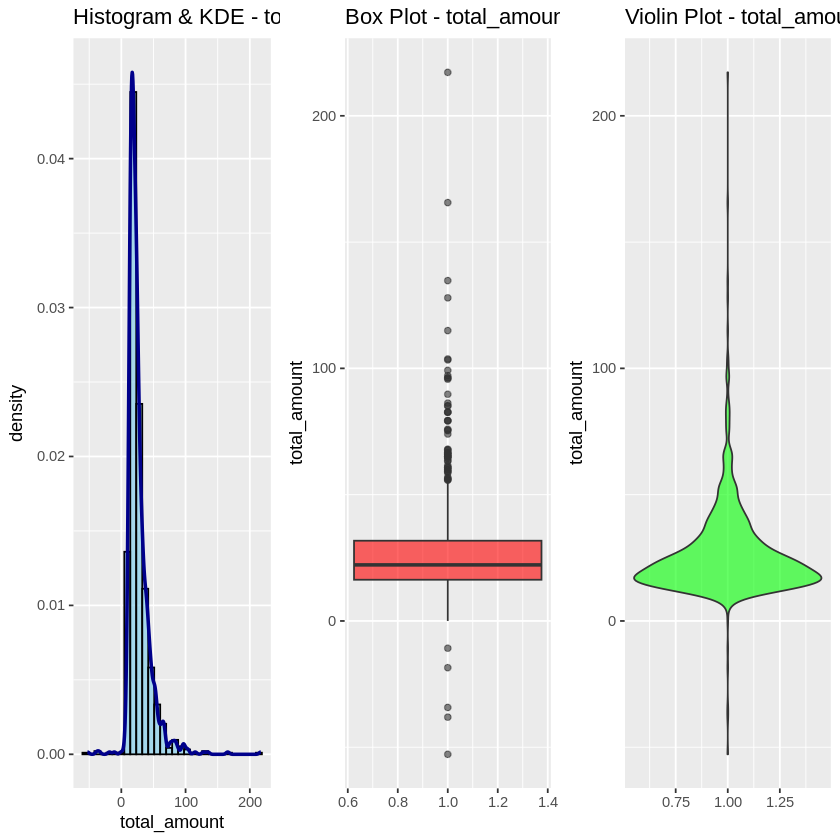

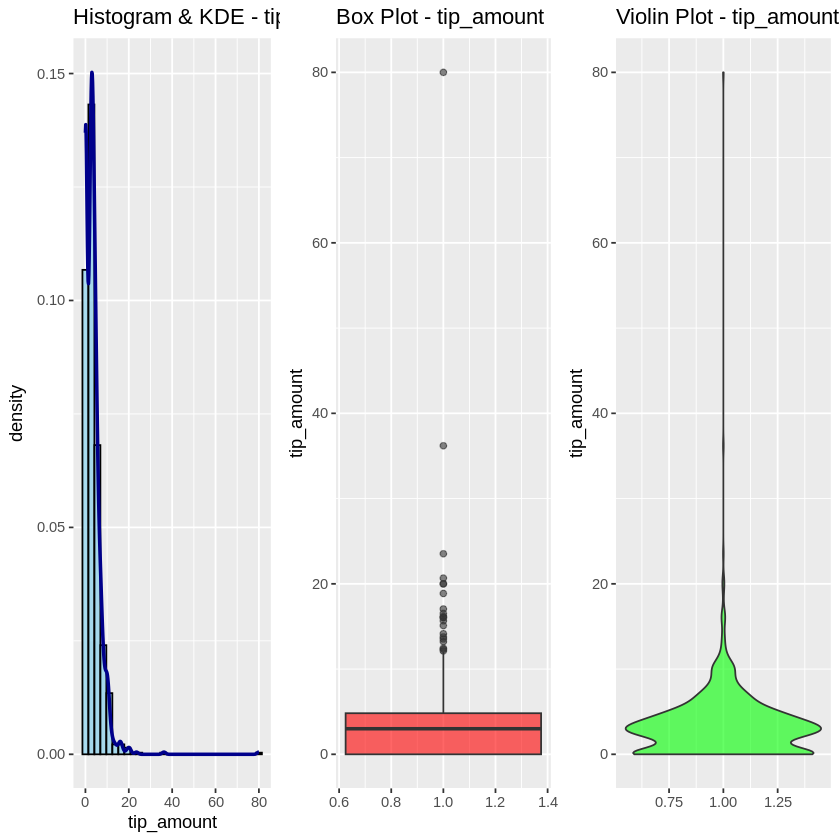

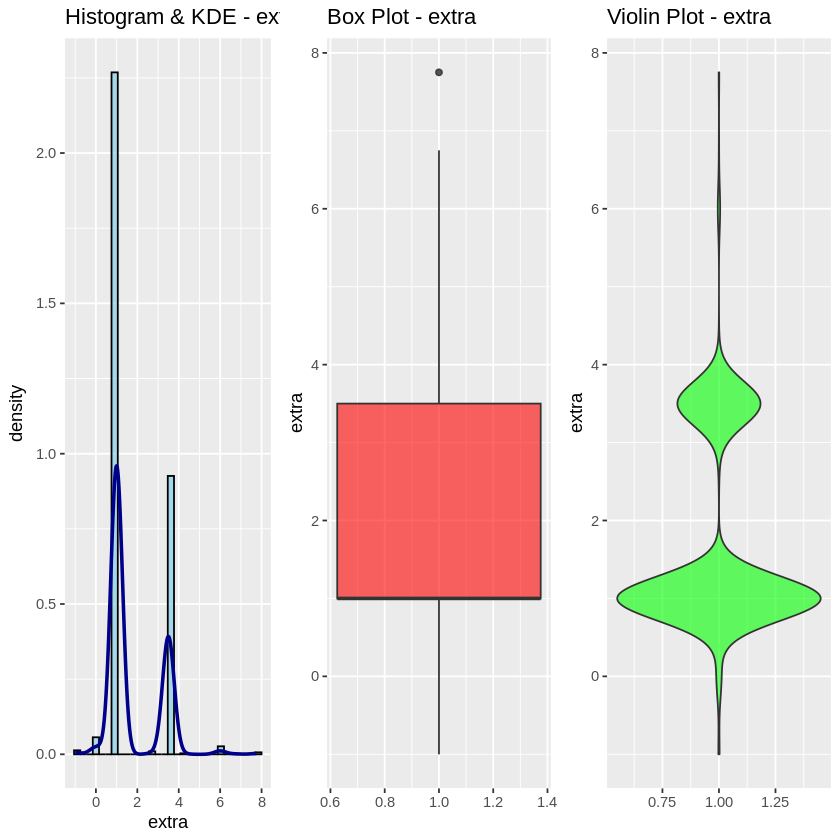

In [7]:
# Required library
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)  # for arranging plots in grid


# Columns to plot
columns <- c("passenger_count", "trip_distance", "fare_amount",
             "total_amount", "tip_amount", "extra")

for (col in columns) {

  # Histogram + Density (KDE)
  p1 <- ggplot(df, aes_string(x = col)) +
    geom_histogram(aes(y=..density..), bins = 30, fill = "skyblue", color = "black", alpha=0.7) +
    geom_density(color = "darkblue", size = 1) +
    ggtitle(paste("Histogram & KDE -", col))

  # Box Plot
  p2 <- ggplot(df, aes_string(x = "1", y = col)) +
    geom_boxplot(fill = "red", alpha=0.6) +
    ggtitle(paste("Box Plot -", col)) +
    xlab("")

  # Violin Plot
  p3 <- ggplot(df, aes_string(x = "1", y = col)) +
    geom_violin(fill = "green", alpha=0.6) +
    ggtitle(paste("Violin Plot -", col)) +
    xlab("")

  # Arrange side by side
  grid.arrange(p1, p2, p3, ncol = 3)
}


In [8]:
# Mean
mean_trip <- mean(df$trip_distance, na.rm = TRUE)

# Standard error
sem_trip <- sd(df$trip_distance, na.rm = TRUE) / sqrt(sum(!is.na(df$trip_distance)))

# 95% Confidence Interval using t-distribution
ci_trip <- t.test(df$trip_distance, conf.level = 0.95)

# Print results
cat("Mean Trip Distance:", mean_trip, "\n")
cat("95% CI for Trip Distance:", ci_trip$conf.int, "\n")


Mean Trip Distance: 2.890472 
95% CI for Trip Distance: 2.696047 3.084898 


In [9]:
# One-sample t-test: testing if mean tip_amount = 2
t_test_result <- t.test(df$tip_amount, mu = 2)

cat("One-sample t-test:\n")
cat("t-statistic =", t_test_result$statistic, "\n")
cat("p-value =", t_test_result$p.value, "\n")

if (t_test_result$p.value < 0.05) {
  cat("Reject H₀: The average tip is significantly different from $2\n")
} else {
  cat("Fail to reject H₀: No significant difference from $2\n")
}


One-sample t-test:
t-statistic = 11.15093 
p-value = 2.728443e-27 
Reject H₀: The average tip is significantly different from $2


In [10]:
# Subset data
credit <- df$fare_amount[df$payment_type == 1]
cash   <- df$fare_amount[df$payment_type == 2]

# Two-sample t-test (Welch's t-test by default in R)
t_test_result <- t.test(credit, cash, var.equal = FALSE)

cat("\nTwo-sample t-test:\n")
cat("t-statistic =", t_test_result$statistic, "\n")
cat("p-value =", t_test_result$p.value, "\n")

if (t_test_result$p.value < 0.05) {
  cat("Reject H₀: Significant difference in fare amounts between payment types\n")
} else {
  cat("Fail to reject H₀: No significant difference\n")
}



Two-sample t-test:
t-statistic = 0.2471815 
p-value = 0.8049474 
Fail to reject H₀: No significant difference


In [11]:
# Contingency table
contingency_table <- table(df$payment_type, df$RatecodeID)

# Chi-square test of independence
chi_test <- chisq.test(contingency_table)

cat("\nChi-square Test of Independence:\n")
cat("Chi-square statistic =", chi_test$statistic, "\n")
cat("p-value =", chi_test$p.value, "\n")
cat("Degrees of freedom =", chi_test$parameter, "\n")

if (chi_test$p.value < 0.05) {
  cat("Reject H₀: Payment type and RateCodeID are not independent\n")
} else {
  cat("Fail to reject H₀: No significant association\n")
}


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”



Chi-square Test of Independence:
Chi-square statistic = 6.853456 
p-value = 0.5525232 
Degrees of freedom = 8 
Fail to reject H₀: No significant association


In [12]:
# Pearson correlation
correlation <- cor(df$trip_distance, df$fare_amount, method = "pearson")
cat("Pearson Correlation between Trip Distance and Fare Amount:", correlation, "\n")


Pearson Correlation between Trip Distance and Fare Amount: 0.8016584 


In [13]:
# Pearson correlation
correlation <- cor(df$fare_amount, df$tip_amount, method = "pearson")
cat("Pearson Correlation between Fare Amount and Tip Amount:", correlation, "\n")


Pearson Correlation between Fare Amount and Tip Amount: 0.4930597 


In [14]:
# Spearman correlation
correlation <- cor(df$trip_distance, df$fare_amount, method = "spearman")
cat("Spearman Correlation between Trip Distance and Fare Amount:", correlation, "\n")


Spearman Correlation between Trip Distance and Fare Amount: 0.8731193 


In [15]:
# Spearman correlation
correlation <- cor(df$fare_amount, df$tip_amount, method = "spearman")
cat("Spearman Correlation between Fare Amount and Tip Amount:", correlation, "\n")


Spearman Correlation between Fare Amount and Tip Amount: 0.4164679 


              trip_distance fare_amount tip_amount
trip_distance     1.0000000   0.8016584  0.4322137
fare_amount       0.8016584   1.0000000  0.4930597
tip_amount        0.4322137   0.4930597  1.0000000


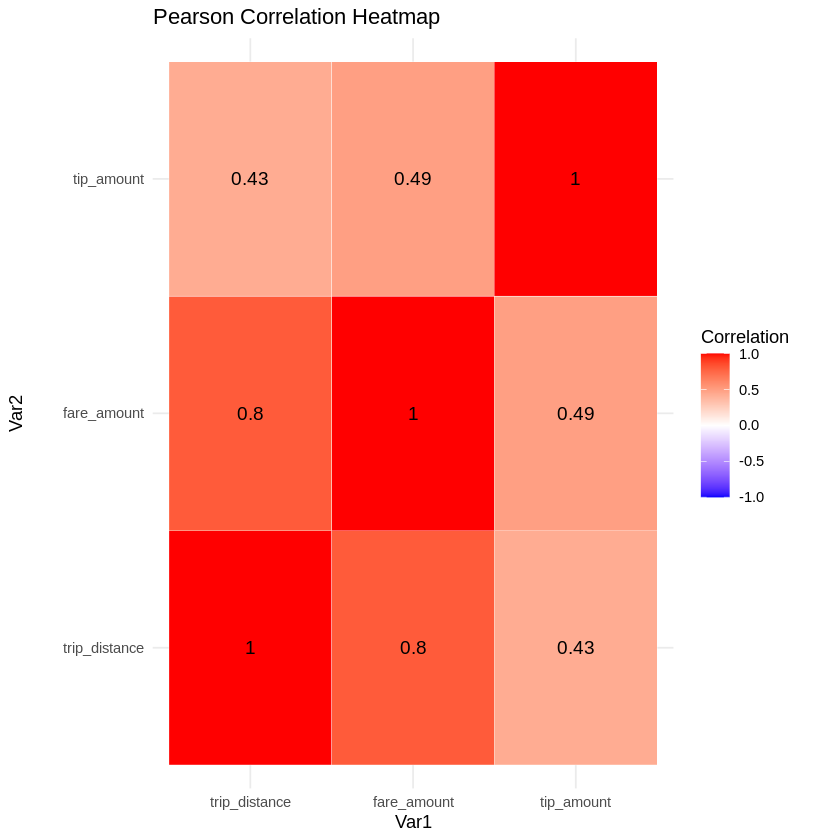

In [17]:
# Pearson correlation matrix
numeric_df <- df[, c("trip_distance", "fare_amount", "tip_amount")]
pearson_corr <- cor(numeric_df, method = "pearson")

print(pearson_corr)

# Convert to long format (instead of melt from reshape2)
corr_melt <- as.data.frame(as.table(pearson_corr))

library(ggplot2)

ggplot(corr_melt, aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(Freq, 2)), color = "black", size = 4) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1)) +
  theme_minimal() +
  labs(title = "Pearson Correlation Heatmap",
       fill = "Correlation")



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




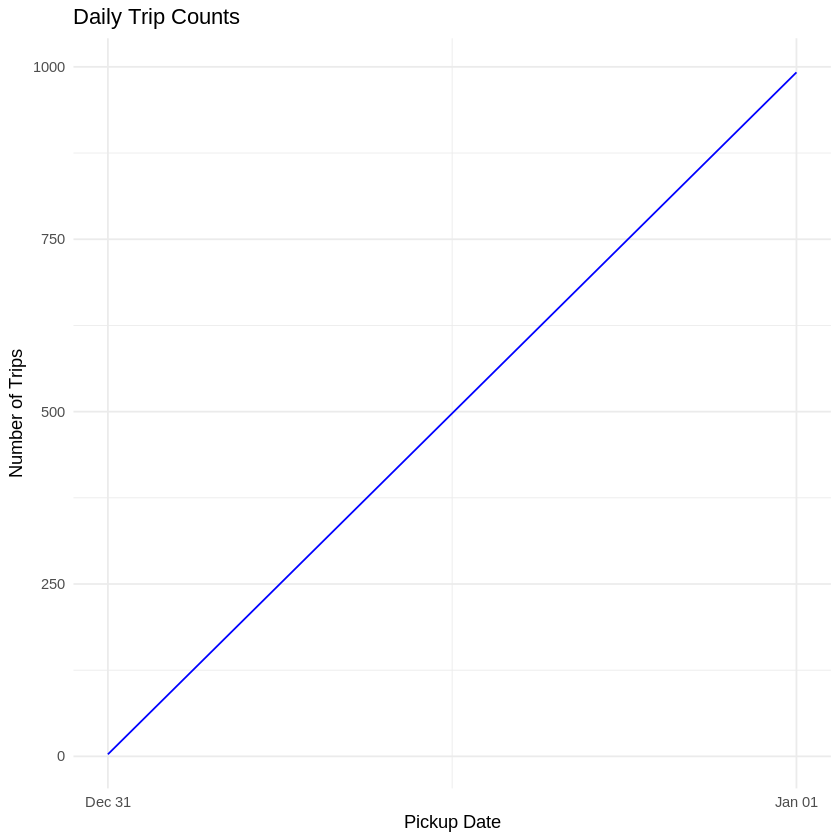

In [18]:
library(dplyr)
library(lubridate)
library(ggplot2)

# Convert pickup datetime to proper Date
df$tpep_pickup_datetime <- as.POSIXct(df$tpep_pickup_datetime)

# Group by date and count trips
daily_counts <- df %>%
  mutate(pickup_date = as.Date(tpep_pickup_datetime)) %>%
  group_by(pickup_date) %>%
  summarise(trip_count = n())

# Plot daily trip counts
ggplot(daily_counts, aes(x = pickup_date, y = trip_count)) +
  geom_line(color = "blue") +
  labs(title = "Daily Trip Counts",
       x = "Pickup Date",
       y = "Number of Trips") +
  theme_minimal()


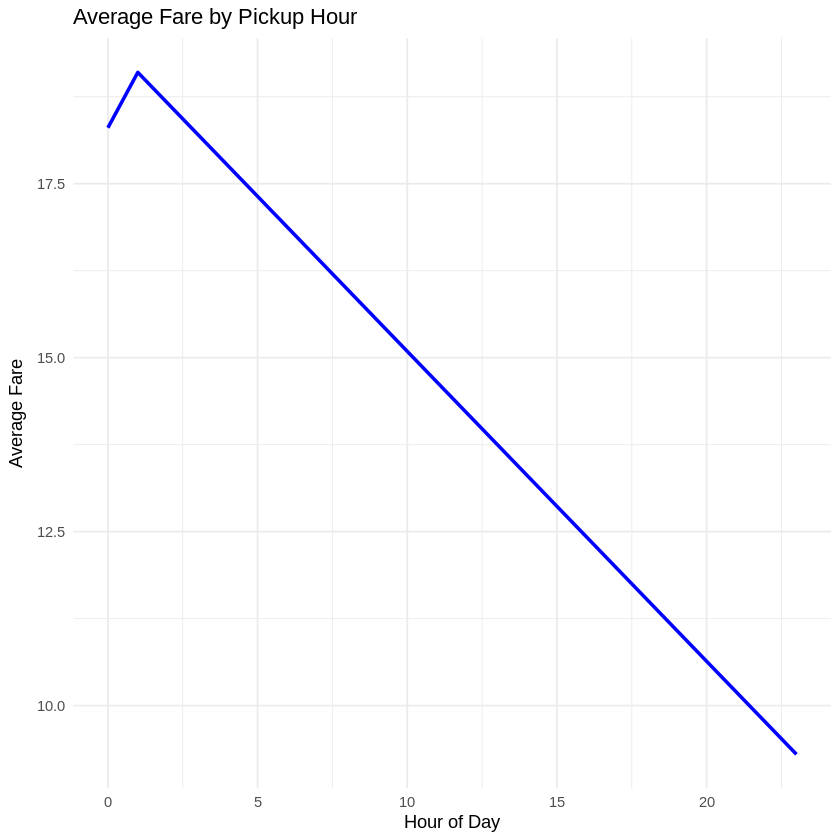

In [19]:
library(dplyr)
library(lubridate)
library(ggplot2)

# Extract hour from pickup datetime
df <- df %>%
  mutate(hour = hour(tpep_pickup_datetime))

# Line plot: average fare by hour
ggplot(df, aes(x = hour, y = fare_amount)) +
  stat_summary(fun = mean, geom = "line", color = "blue", size = 1) +
  labs(title = "Average Fare by Pickup Hour",
       x = "Hour of Day",
       y = "Average Fare") +
  theme_minimal()
